In [1]:
import math
import copy
import matplotlib.pyplot as plt
import numpy as np
import csv
import random
from random import choices

import csv
import time
from numpy import linalg as LA
from numpy.linalg import eig
import matplotlib.pyplot as plt
import statistics
from matplotlib.pyplot import figure


Import the Data Set

In [2]:
m=[]
p=[]
for i in range(1,201):
  txt_file = open(str(i), "r")
  file_content = txt_file.read()
  q = file_content.split(" ")
  q.remove("")
  m+=q
  p.append(q)
  txt_file.close()
################
reader = csv.reader(open("index.csv", "r"), delimiter=",")
x = list(reader)
arti_ind = np.array(x).astype("float")



print(p)

[['info', 'companies', 'market', 'cost', 'email', 'uiuc', 'edu'], ['service', 'bmw', 'writes', 'article', 'apr', 'writes', 'tool', 'service', 'lights', 'come', 'back', 'tool', 'fact', 'europe', 'case', 'buy', 'used', 'bmw', 'lights', 'come', 'tool', 'service', 'works', 'start', 'car', 'drive', 'car', 'time', 'start', 'service', 'time', 'service', 'service', 'expect', 'tool', 'lights', 'come', 'lights', 'people', 'oil', 'change', 'car', 'changing', 'oil', 'miles', 'big', 'oil', 'time', 'thought', 'oil', 'change', 'oil', 'bmw', 'net', 'question', 'service', 'bmw', 'tool', 'service', 'lights', 'cost', 'buying', 'people', 'oil', 'change', 'important', 'reason', 'stop', 'light', 'cars', 'change', 'oil', 'engine', 'good', 'life', 'change', 'don', 'lights', 'come', 'servicing', 'car', 'bought', 'bmw', 'months', 'lights', 'oil', 'brake', 'oil', 'air', 'fuel', 'transmission', 'drive', 'things', 'service', 'service', 'miles', 'lights', 'today', 'bad', 'good', 'university', 'research', 'group', '

# **Task 1**

In [3]:
vocab=list(set(m))
words=m
k=20
alpha=[5/20]*20
beta =len(vocab)*[0.01]
N_iter=500
N_words=len(words)
V=len(vocab)
D=200

topic=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
rand=[]
d=[]

l=0
for i in p:
  for j in range(len(i)):
     d.append(l)
  l+=1   
w=[i for i in range(0,N_words)]
rand = random.sample(range(0, N_words), N_words)#random permutation
z=list(np.random.randint(low = 0,high=k,size=N_words))#topic initialization


Parameter Initialization

In [4]:
tmp=[]
D_k=[]#Cd
V_k=np.zeros((len(topic),len(vocab)))#Ct
start_pointer=0
end_pointer=0
for j in p:
        end_pointer=len(j)
        
        for l in range(k):
          tmp.append(z[start_pointer:end_pointer].count(l)) 
        D_k.append(tmp)
        start_pointer=end_pointer
        tmp=[]
w_m={}
for i in range(len(vocab)):
  w_m[vocab[i]]=i

for l in range(len(words)):
   V_k[z[l]][w_m[words[l]]]+=1
V_k=V_k.tolist()   

Gibs Sampling Algorithm

In [5]:
P=len(topic)*[0]
data=[]
for i in range(0,N_iter):
  for n in range(0,N_words):
    word=w_m[words[rand[n]]]
    
    doc=d[rand[n]]
    data.append(doc)
    top=z[rand[n]]
    D_k[doc][top]-=1
    V_k[top][word]-=1
    for k in range(len(topic)):
      P[k]=((V_k[k][word] + 0.01 )/(sum(beta)+sum(V_k[k])) )  *    ((D_k[doc][k]+0.25)/(sum(alpha)+ sum( D_k[doc])))  
       
       
    P = list(map(lambda x: x/sum(P), P))
    top=choices(topic,P)[0]#Sampling the topic
    z[rand[n]]=top
    D_k[doc][top]+=1
    V_k[top][word]+=1




Output: Frequent Topics

In [6]:
N = 5
final=[]
for t in V_k:
      x = []
      x.extend(t)
      x.sort(reverse=True)
      a = x[:N]
      res = []
      for i in a:
          res.append(vocab[t.index(i)])
      final.append(res)    
      
print(final)          
      

[['edu', 'writes', 'make', 'article', 'don'], ['space', 'nasa', 'gov', 'such', 'shuttle'], ['station', 'option', 'human', 'human', 'redesign'], ['mission', 'hst', 'solar', 'mass', 'pat'], ['oil', 'come', 'apr', 'apr', 'eliot'], ['gif', 'george', 'uci', 'ics', 'ics'], ['internet', 'engines', 'resources', 'resources', 'add'], ['car', 'clutch', 'clutch', 'shifter', 'don'], ['earth', 'earth', 'sky', 'things', 'things'], ['speed', 'book', 'book', 'auto', 'blue'], ['good', 'want', 'insurance', 'geico', 'means'], ['car', 'engine', 'ford', 'driving', 'sho'], ['cars', 'people', 'sky', 'rights', 'real'], ['used', 'day', 'question', 'email', 'true'], ['place', 'read', 'blah', 'case', 'case'], ['uiuc', 'oort', 'system', 'david', 'david'], ['bill', 'back', 'shuttle', 'mars', 'launch'], ['high', 'use', 'similar', 'similar', 'university'], ['etc', 'etc', 'even', 'small', 'large'], ['edu', 'writes', 'article', 'henry', 'don']]


Writing in the text file

In [8]:
with open('final_topic.csv', 'w') as f:
      
    # using csv.writer method from CSV package
    write = csv.writer(f)
      
    
    write.writerows(final)

# **Task 2**

Classification model

Data Import

In [9]:
data=np.array(D_k)
label=np.array(arti_ind)[:,1].reshape((200,1))

In [17]:
data.shape

(200, 20)

In [11]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [12]:
def plot(tmp,data):
  
  plt.title(f"30 iteration graph of data size")
  plt.xlabel("no of iteration")
  plt.ylabel("error")
  plt.legend(['0.1', '0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9','1.0'])

  X=[i for i in range(30)]


  
  
  plt.plot(X,tmp)

In [13]:
def rand1(train_data,train_label):
  full=np.concatenate((train_data,train_label),axis=1)
  np.random.shuffle(full)
  test=full[0:int (train_data.shape[0]*(1/3))]
  train=full[int (train_data.shape[0]*(1/3)) :  ]
  
  test_data=test[:, 0:train_data.shape[1]]
  train_data=train[:, 0:train_data.shape[1]]

  test_label=test[:, -1:]
  train_label=train[:,-1:] 
  return train_data,train_label,test_data,test_label


  

Discriminative approach


In [14]:
def call2(train_data,train_label,test_data):
  n2=np.count_nonzero(train_label==0)#count of 0
  n1=abs(train_label.shape[0]-n2)#count of 1 
  #print(n1,n2)
  p_c1=n1/(n1+n2)
  p_c2=n2/(n1+n2)
  
  tmp=np.ones((train_data.shape[0],1))
  tmp1=np.ones((test_data.shape[0],1))
  train_data=np.append(tmp,train_data,axis=1)
  test_data=np.append(tmp1,test_data,axis=1)
  row=train_data.shape[0]
  col=train_data.shape[1]
  w_n=np.array(np.zeros(train_data.shape[1]))
  w_n=w_n.reshape(train_data.shape[1],1)
  n=0
  test_label=[]
  while(n<100):
      y=np.transpose(sigmoid(np.matmul(np.transpose(w_n),np.transpose(train_data))))
      
      R=np.diag(  (y * (1-y)) .flatten())
      d=np.add(        (.1* np.identity(train_data.shape[1])+np.matmul(np.matmul(np.transpose(train_data),R), train_data )) ,pow(10,-9)*np.identity(train_data.shape[1])     )
      a=np.linalg.inv(d)
      b=np.matmul(np.transpose(train_data),(y-train_label))+.1*w_n 
  
      w_n1=w_n-np.matmul(a,b)
      if( (pow(  (np.linalg.norm(w_n1-w_n)),2)   /   pow(  (np.linalg.norm(w_n) ),2) ) <0.001     ):
            w_n=w_n1
            break;
      w_n=w_n1
      n+=1 
  y=sigmoid(np.matmul(np.transpose(w_n),np.transpose(train_data)))
  R=np.diag(  (y * (1-y)) .flatten())
  s_n=np.linalg.inv( .1 * np.identity(col)) +np.matmul(np.matmul(np.transpose(train_data),R),train_data)
       
  for i in range(test_data.shape[0]):
        u_a=np.matmul(np.transpose(w_n),np.transpose(test_data[i]))
        sigma=np.matmul(np.matmul(test_data[i],s_n),np.transpose(test_data[i]))
        k=np.sqrt(1/((1+(p_c1*sigma)/8)))
        pc1_x=sigmoid(k*u_a) 
        pc1_x=1 if pc1_x>.5 else 0
        test_label.append(pc1_x)     
         
  
  return test_label


<ipython-input-14-11ece76b339c>:27: RuntimeWarning: divide by zero encountered in double_scalars
  if( (pow(  (np.linalg.norm(w_n1-w_n)),2)   /   pow(  (np.linalg.norm(w_n) ),2) ) <0.001     ):


mean for data set : 0.1 is 0.3242424242424242 and standard deviation is  0.08179689339517532 
mean for data set : 0.2 is 0.2813131313131313 and standard deviation is  0.061601456582183696 
mean for data set : 0.3 is 0.25757575757575757 and standard deviation is  0.05710914700915239 


<ipython-input-11-ebbe1fbd659a>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


mean for data set : 0.4 is 0.26161616161616164 and standard deviation is  0.07967244511566038 
mean for data set : 0.5 is 0.23585858585858585 and standard deviation is  0.04617734843538612 
mean for data set : 0.6 is 0.21464646464646464 and standard deviation is  0.04305460432999511 
mean for data set : 0.7 is 0.21464646464646464 and standard deviation is  0.056563635083548836 
mean for data set : 0.8 is 0.21161616161616162 and standard deviation is  0.04385614087719175 
mean for data set : 0.9 is 0.1914141414141414 and standard deviation is  0.04238752951956064 
mean for data set : 1.0 is 0.19343434343434343 and standard deviation is  0.05551833717373519 


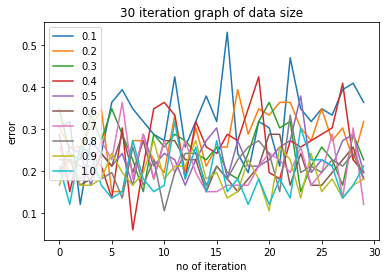

In [23]:
size=[.1,.2,.3,.4,.5,.6,.7,.8,.9,1.0]
for i in size:
  tmp=[]
  for j in range(30):
    train_data,train_label,test_data,test_label=rand1(data,label)
    a=call2(train_data[0:int(train_data.shape[0]*i)],train_label[0: int(train_label.shape[0]*i)],test_data)
    a=np.array(a).reshape(test_data.shape[0],1)
    tmp.append(np.count_nonzero(a !=test_label)/test_label.shape[0])
    
  print(f"mean for data set : {i} is {statistics.mean(tmp)} and standard deviation is  {pow(statistics.variance(tmp),1/2)} ")
  plot(tmp,i)
  
plt.legend(['0.1', '0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9','1.0'])


Bag of Words

Data Import

In [18]:
data_2=[]
for d in p:
  tmp=[]
  for j in vocab:
     tmp.append(d.count(j))
  data_2.append(tmp)


In [19]:
data_2=np.array(data_2)

In [20]:
data_2.shape

(200, 405)

<ipython-input-14-11ece76b339c>:27: RuntimeWarning: divide by zero encountered in double_scalars
  if( (pow(  (np.linalg.norm(w_n1-w_n)),2)   /   pow(  (np.linalg.norm(w_n) ),2) ) <0.001     ):


mean for data set : 0.1 is 0.2590909090909091 and standard deviation is  0.0948593174714154 
mean for data set : 0.2 is 0.15202020202020203 and standard deviation is  0.051800692040269894 
mean for data set : 0.3 is 0.09292929292929293 and standard deviation is  0.03416677575493022 
mean for data set : 0.4 is 0.09343434343434344 and standard deviation is  0.043238076486425615 
mean for data set : 0.5 is 0.0803030303030303 and standard deviation is  0.03186914364369955 
mean for data set : 0.6 is 0.06363636363636364 and standard deviation is  0.03455077045754963 
mean for data set : 0.7 is 0.06060606060606061 and standard deviation is  0.029775980875182878 
mean for data set : 0.8 is 0.05808080808080808 and standard deviation is  0.02641856818532542 
mean for data set : 0.9 is 0.050505050505050504 and standard deviation is  0.024635441859640537 
mean for data set : 1.0 is 0.044444444444444446 and standard deviation is  0.027548051042893897 


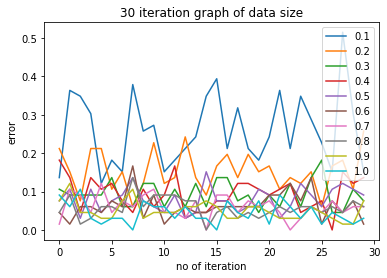

In [22]:
size=[.1,.2,.3,.4,.5,.6,.7,.8,.9,1.0]
for i in size:
  tmp=[]
  for j in range(30):
    train_data,train_label,test_data,test_label=rand1(data_2,label)
    a=call2(train_data[0:int(train_data.shape[0]*i)],train_label[0: int(train_label.shape[0]*i)],test_data)
    a=np.array(a).reshape(test_data.shape[0],1)
    tmp.append(np.count_nonzero(a !=test_label)/test_label.shape[0])
    
  print(f"mean for data set : {i} is {statistics.mean(tmp)} and standard deviation is  {pow(statistics.variance(tmp),1/2)} ")
  plot(tmp,i)
  
plt.legend(['0.1', '0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9','1.0'])
